In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from sklearn.datasets import load_iris
import plotly.express as px
import plotly.io as pio
pio.renderers.default='plotly_mimetype+notebook_connected'
import warnings
warnings.filterwarnings('ignore')

### Dataset:

Source: World Bank (World Development Indicators Database)

Timeframe: 2005-2024

### Reasearch Questions:

How do different factors of population (size, growth, life expectancy, migration) relate to GDP per capita?

Can we learn anything about wealth inequality by looking at any metrics of population or GDP?

Are there any trends between countries or time periods? Are there any deviations from ususal patterns?

In [5]:
wb=pd.read_csv('data/wbMT.csv')
wb.columns.values[-20:]=wb.columns[-20:].str[:-9]
wb=wb.dropna()
wb2=pd.read_csv("Data/WBnew.csv")
wb2.columns.values[-20:]=wb2.columns[-20:].str[:-9]
wb2=wb2.dropna()
cc=wb['Country Code'].unique()
wb2=wb2[wb2['Country Code'].isin(cc)]

def mp(x):
    years=[]
    for i in range (2005, 2025):
        x[str(i)]=pd.to_numeric(x[str(i)], errors='coerce')
        years.append(str(i))
    x=pd.melt(x, id_vars=['Country Name','Series Name'], value_vars=years, var_name='Year', value_name='Value')
    x=x.pivot(index=['Country Name', 'Year'], columns='Series Name', values='Value').reset_index()
    return x

wb=mp(wb)
wb2=mp(wb2)
dt=pd.merge(wb, wb2, on=['Country Name', 'Year'])
dt

Series Name,Country Name,Year,GNI per capita growth (annual %),Gini index,Population growth (annual %),"Population, total","Unemployment, total (% of total labor force) (national estimate)",GDP per capita (current US$),"Hospital beds (per 1,000 people)",Income share held by highest 10%,"Life expectancy at birth, total (years)",Net migration,Real interest rate (%),Researchers in R&D (per million people),Secure Internet servers (per 1 million people)
0,Argentina,2005,6.447488,47.8,1.027458,39216789.0,11.506,5067.653423,4.00,35.0,75.231000,-22068.0,NaN,816.841187,NaN
1,Argentina,2006,17.601678,46.4,1.028248,39622115.0,10.078,5869.380290,NaN,33.8,75.279000,-20109.0,NaN,888.891663,NaN
2,Argentina,2007,9.531659,46.3,0.991102,40016763.0,8.470,7185.251551,NaN,33.7,74.783000,-18099.0,NaN,971.290100,NaN
3,Argentina,2008,5.235697,45.0,1.012889,40424148.0,7.837,8944.110266,NaN,32.5,75.428000,-12517.0,NaN,1032.674805,NaN
4,Argentina,2009,-8.149816,43.8,1.059775,40854831.0,8.645,8150.235270,NaN,31.3,75.577000,-7882.0,NaN,1031.641357,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,United States,2020,-2.866961,40.0,0.408428,331577720.0,8.055,64401.507435,2.74,29.3,76.980488,329769.0,2.186282,4464.094727,140775.773475
236,United States,2021,5.528107,39.7,0.157317,332099760.0,5.349,71307.401728,NaN,29.7,76.329268,674787.0,-1.258522,4825.180176,156949.432905
237,United States,2022,1.852199,41.7,0.575745,334017321.0,3.650,77860.911291,NaN,30.4,77.434146,1319009.0,NaN,NaN,180213.052484
238,United States,2023,1.821216,41.8,0.831493,336806231.0,3.638,82304.620427,NaN,30.4,78.385366,1322668.0,NaN,NaN,186692.908897


First, lets take a look at the make-up of the dataset. We will want to see the years and countries that are included, and a visaulization of GDP per Capita.

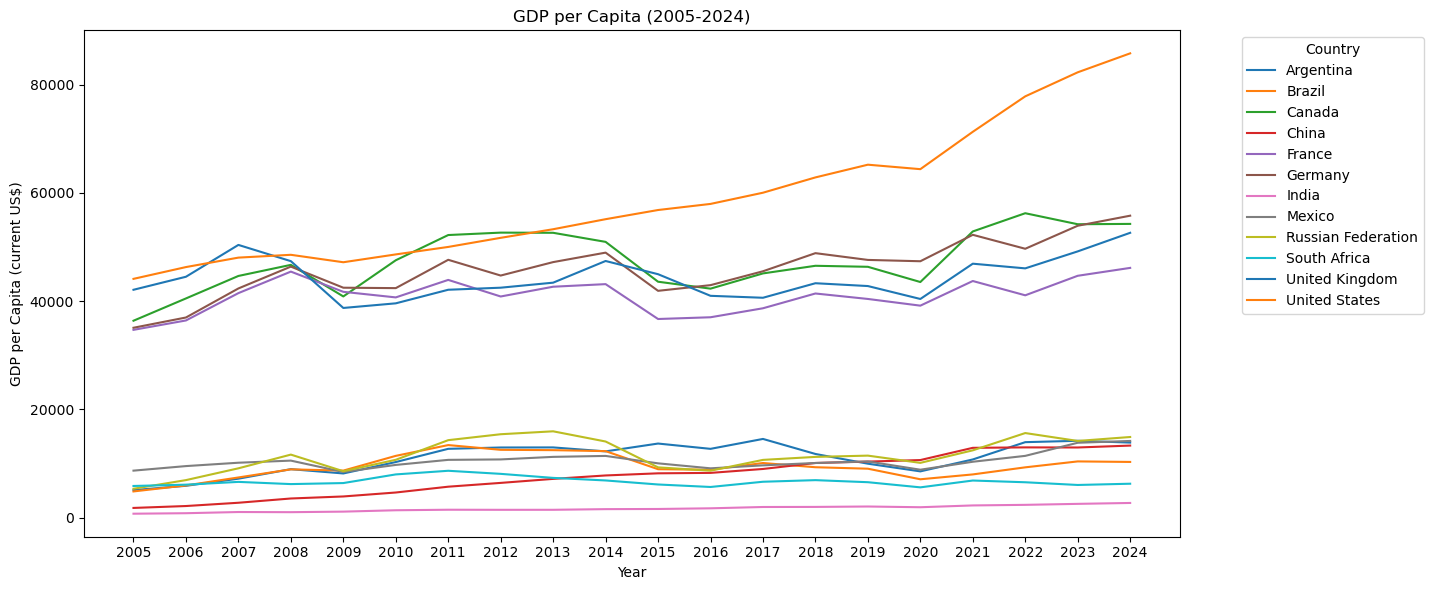

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=dt, x='Year', y='GDP per capita (current US$)', hue='Country Name', palette='tab10')
plt.title('GDP per Capita (2005-2024)')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (current US$)')
plt.tight_layout()
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

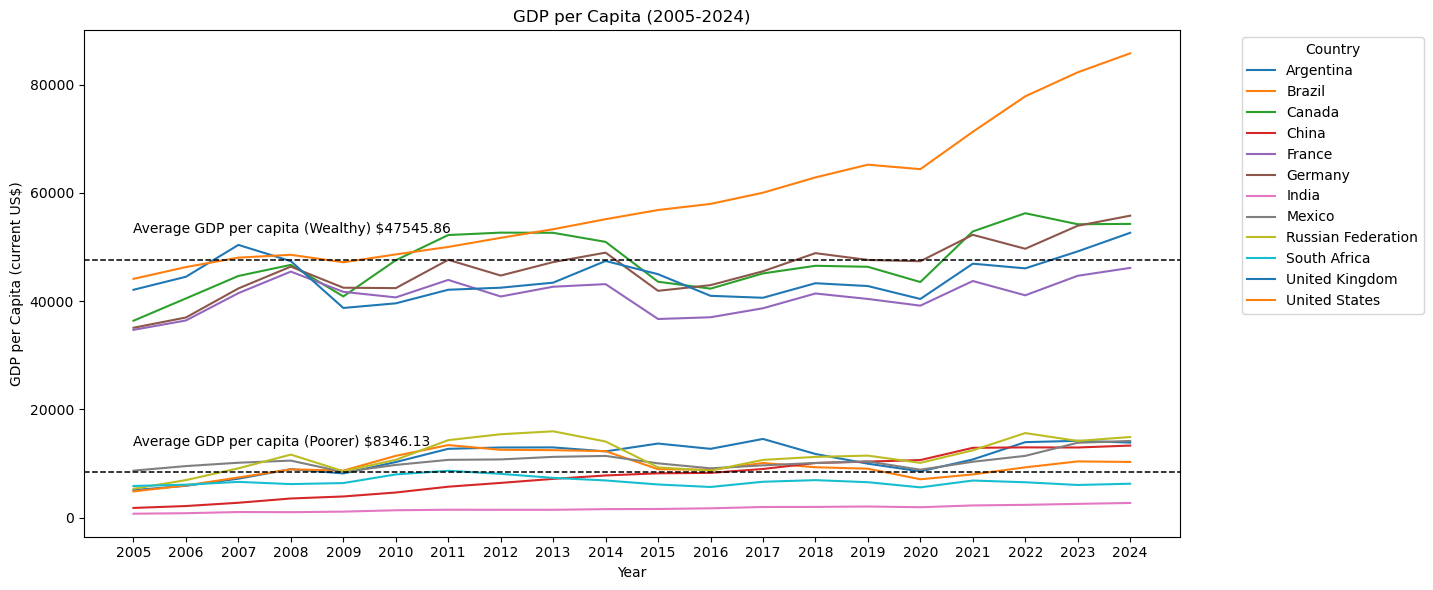

In [8]:
dy=dt.groupby('Country Name')['GDP per capita (current US$)'].mean()
filter=dy[dy>dy.mean()]
dt['Wealthy']=dt['Country Name'].isin(filter.index)
wdy=dt.groupby('Wealthy')['GDP per capita (current US$)'].mean()

plt.figure(figsize=(12, 6))
p=sns.lineplot(data=dt, x='Year', y='GDP per capita (current US$)', hue='Country Name', palette='tab10')
p.axhline(y=wdy[0], color='black', linestyle='--', linewidth=1.1)
p.axhline(y=wdy[1], color='black', linestyle='--', linewidth=1.1)
p.text(x='2005', y=wdy[0]+7000, s='Average GDP per capita (Poorer) $'+str(round(wdy[0], 2)), color='black', va='top')
p.text(x='2005', y=wdy[1]+7000, s='Average GDP per capita (Wealthy) $'+str(round(wdy[1], 2)), color='black', va='top')
plt.title('GDP per Capita (2005-2024)')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (current US$)')
plt.tight_layout()
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

There are clearly two groups of countries in this dataset, with the dividing factor being economies. We are going to want to seperate the strong and weak economies so we can take a closer look at each group. Hopefully this will allow is to see more details and organize the data for comparisons.

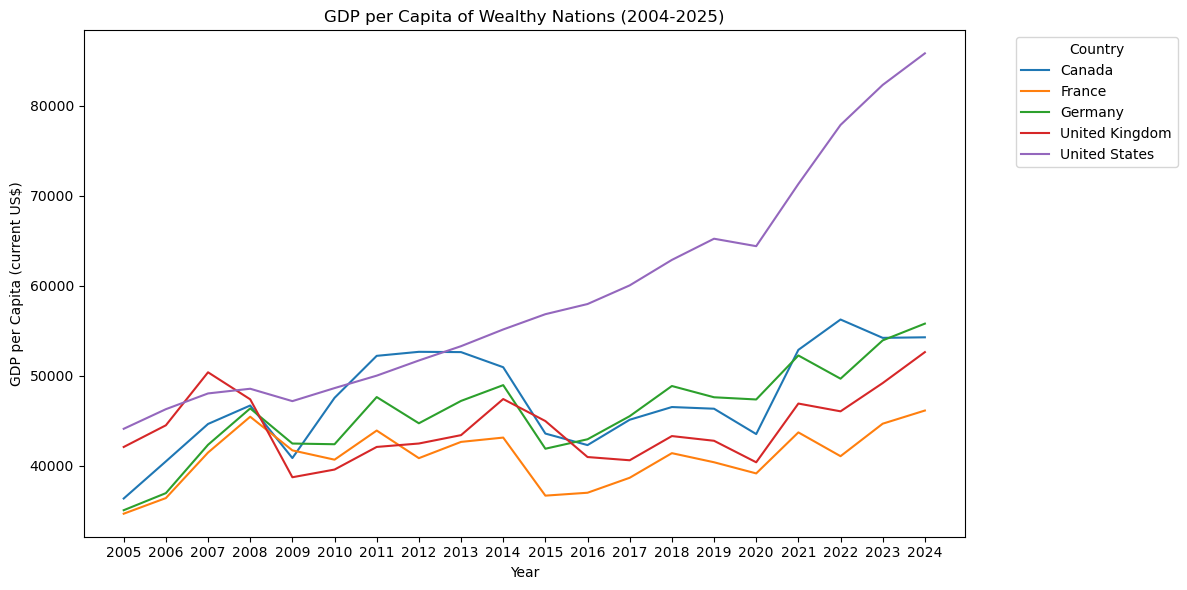

In [10]:
dy=dt.groupby('Country Name')['GDP per capita (current US$)'].mean()
filter=dy[dy>dy.mean()]
dt['Wealthy']=dt['Country Name'].isin(filter.index)

filtered_dt=dt[dt['Wealthy']==True]

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_dt, x='Year', y='GDP per capita (current US$)', hue='Country Name', palette='tab10')
plt.title('GDP per Capita of Wealthy Nations (2004-2025)')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (current US$)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

One part that stands out is the United States growth following 2013, as they had a GDP per Capita $10,000 higher than all other countries every year after. Looking at the other 4 countries, the dips and rises seem to follow a pattern; this gives us a key insight that France, Germany, the U.K, and Canada will have similar variance throughout the years as they seem to have equal impact from world events.

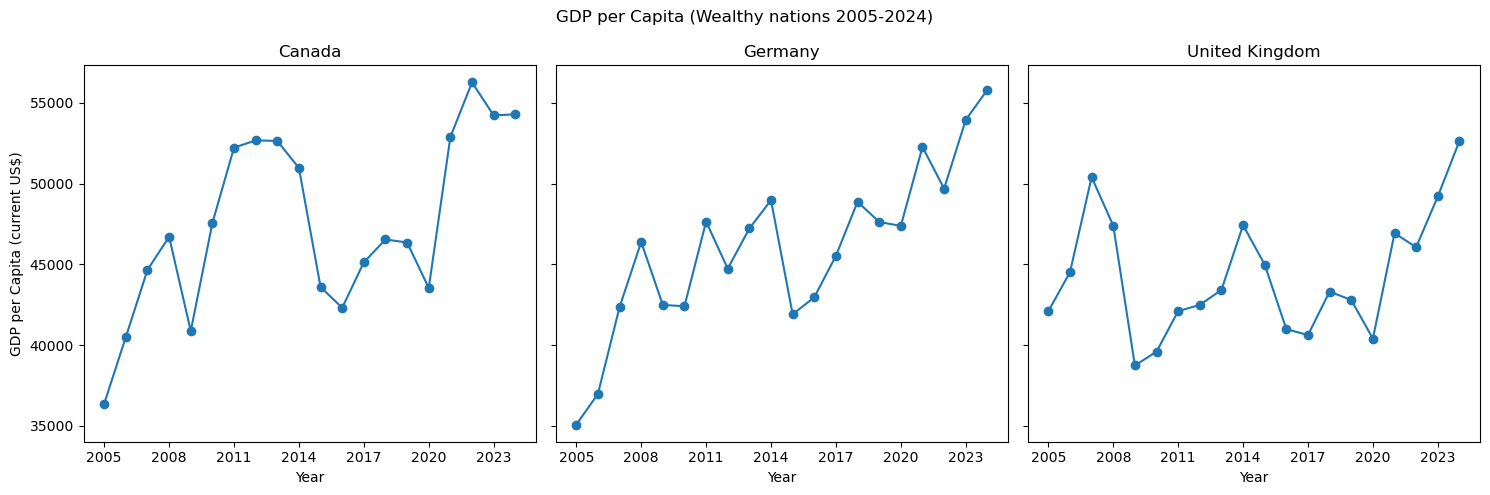

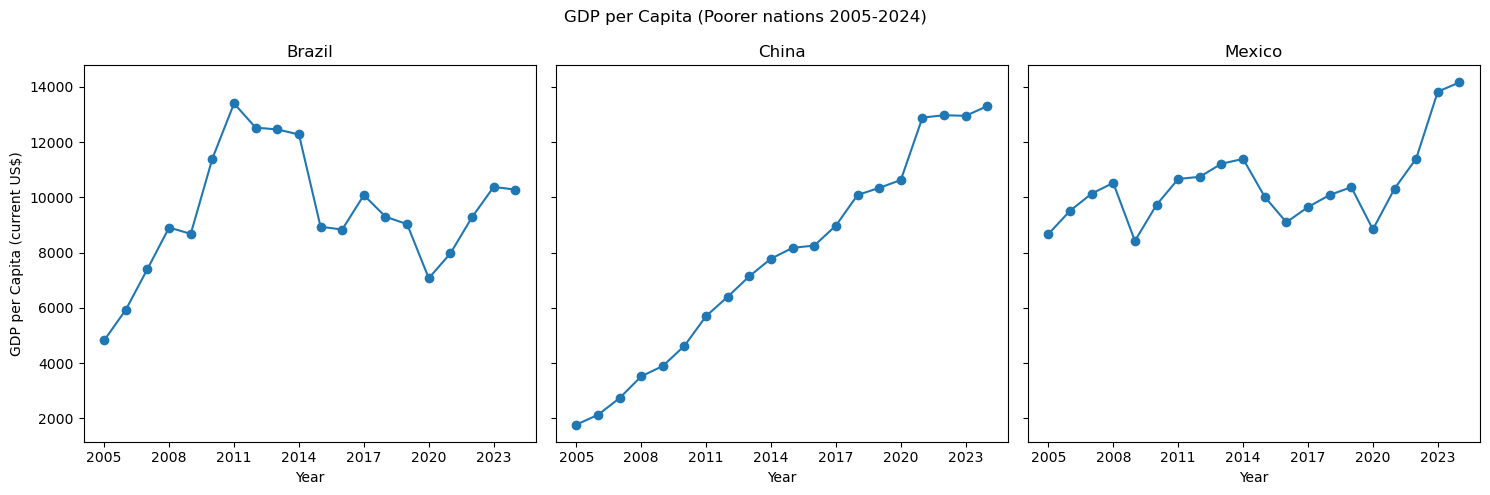

In [12]:
wc=dt[dt["Country Name"].isin(["Germany", "Canada", "United Kingdom"])]
pc=dt[dt["Country Name"].isin(["China", "Mexico", "Brazil"])]
i=0
fig, axes=plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for c in wc['Country Name'].unique():
    cur=wc[wc['Country Name']==c]
    axes[i].plot(cur['Year'], cur['GDP per capita (current US$)'], marker='o')
    axes[i].set_xticks(cur['Year'][::3])
    axes[i].set_title(c)
    axes[i].set_xlabel("Year")
    axes[0].set_ylabel("GDP per Capita (current US$)")
    i+=1
fig.suptitle('GDP per Capita (Wealthy nations 2005-2024)')
plt.tight_layout()
plt.show()
i=0
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for c in pc['Country Name'].unique():
    cur=pc[pc['Country Name']==c]
    axes[i].plot(cur['Year'], cur['GDP per capita (current US$)'], marker='o')
    axes[i].set_xticks(cur['Year'][::3])
    axes[i].set_title(c)
    axes[i].set_xlabel("Year")
    axes[0].set_ylabel("GDP per Capita (current US$)")
    i+=1
fig.suptitle('GDP per Capita (Poorer nations 2005-2024)')
plt.tight_layout()
plt.show()

For this visualization I chose countries that shared a similar range of values in order to increase readability. This graph shows us the trends that each economy had over the last 20 years. China is the only country that was able to keep consistent growth, which may be due to size of their economy because the United States also saw stable growth. It seems the nations that are not major powers have a lot more volatility throughout the years, and are impacted more by world events like the 2008 financial crash. Next, lets look at how GDP per capita relates to another measurement in the dataset.

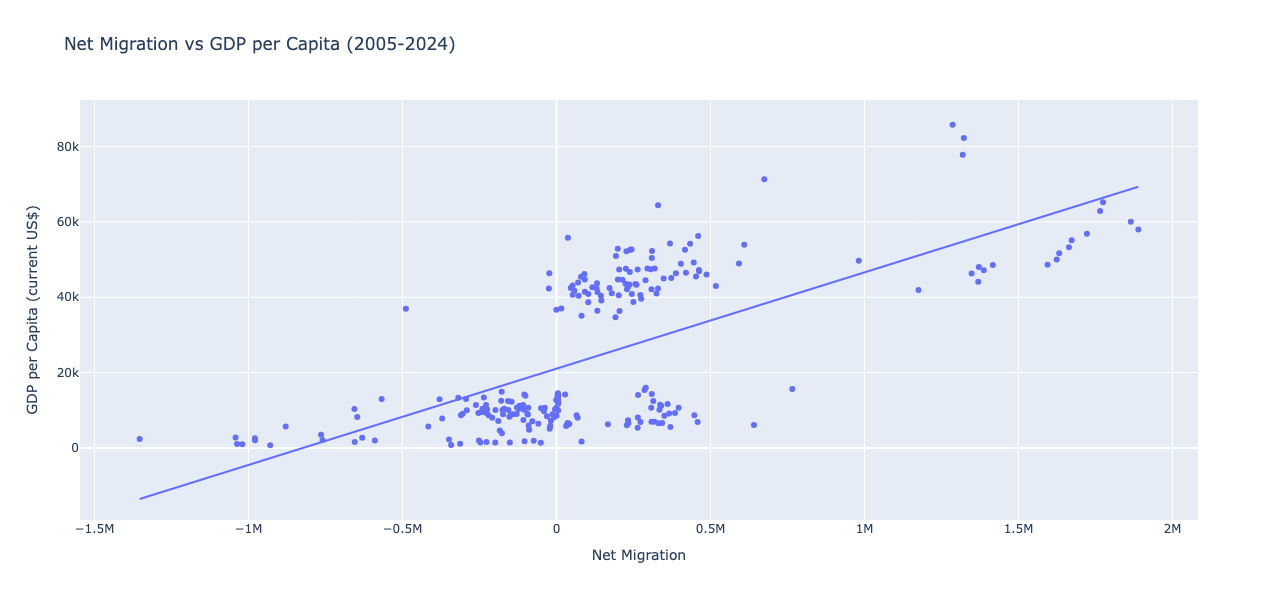

In [14]:
fig=px.scatter(dt, x='Net migration', y='GDP per capita (current US$)', trendline='ols', hover_data=['Country Name', 'Year'], 
                  title='Net Migration vs GDP per Capita (2005-2024)')
fig.update_layout(xaxis_title='Net Migration', yaxis_title='GDP per Capita (current US$)', width=950, height=600)
fig

From this visualization we can see a trend of people migrating from poorer nations to wealthier ones in the dataset. Although we do not have many countries in the sample, it is reasonable to state that migration is positively correlated with GDP per capita; this is understandable as people often migrate for economic reasons. For the next comparison, we will start by analyzing the distribution for life expectancy in our dataset, and then life expectancy with GDP per capita.

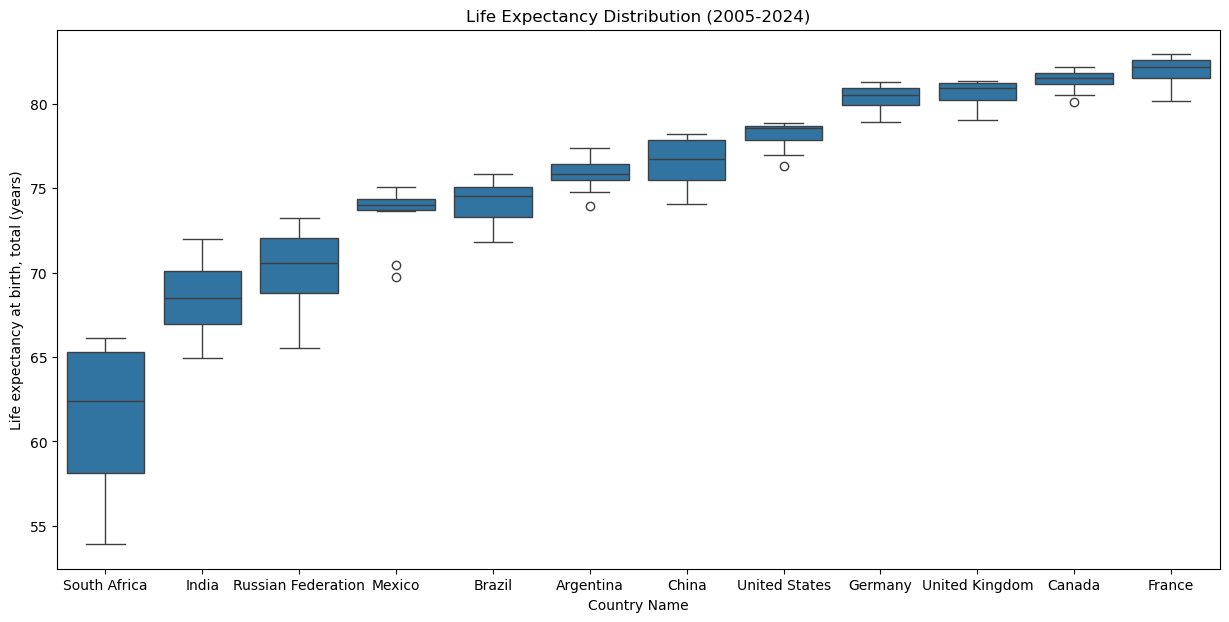

In [16]:
dl=dt.sort_values('Life expectancy at birth, total (years)')
plt.figure(figsize=(15, 7))
sns.boxplot(x='Country Name', y='Life expectancy at birth, total (years)', data=dl)
plt.title('Life Expectancy Distribution (2005-2024)')
plt.show()

It looks as though the distribution is fairly uniform for all the countries asides from South Africa. In order to get a clean comparison of life expectancy and GDP per capita, it would be best to drop South Africa from the final chart as the results may be skewed and uneven if we keep it.

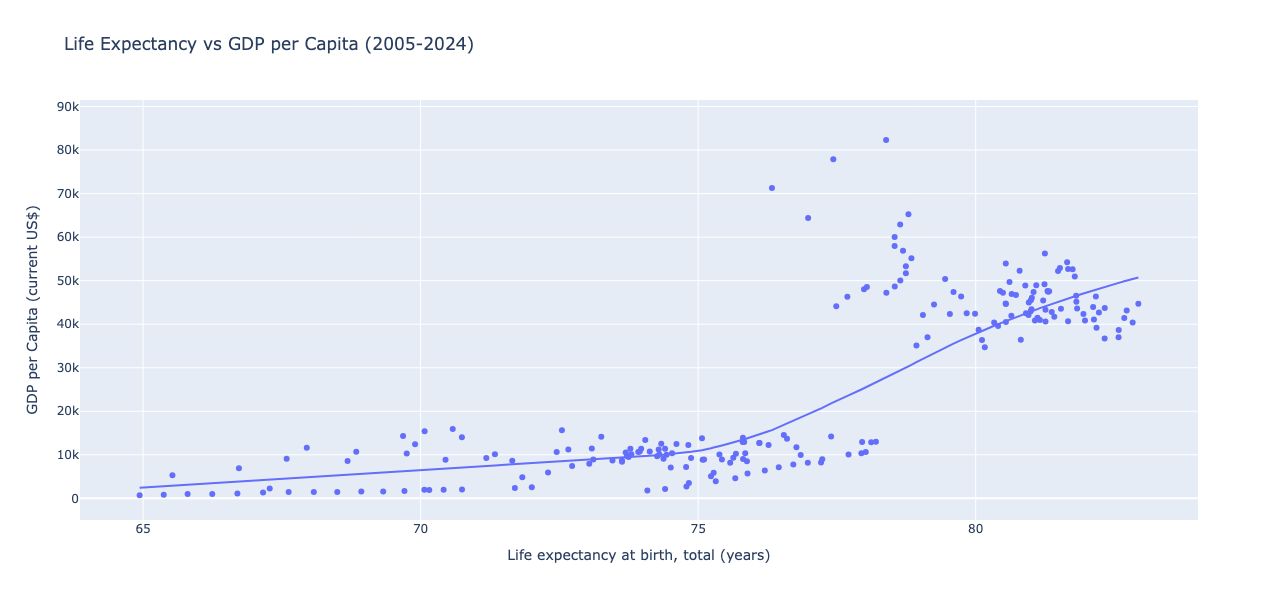

In [18]:
dl=dl[dl["Country Name"]!="South Africa"]
fig=px.scatter(dl, x='Life expectancy at birth, total (years)', y='GDP per capita (current US$)', trendline='lowess', hover_data=['Country Name', 'Year'], 
                  title='Life Expectancy vs GDP per Capita (2005-2024)')
fig.update_layout(xaxis_title='Life expectancy at birth, total (years)', yaxis_title='GDP per Capita (current US$)', width=950, height=600)
fig

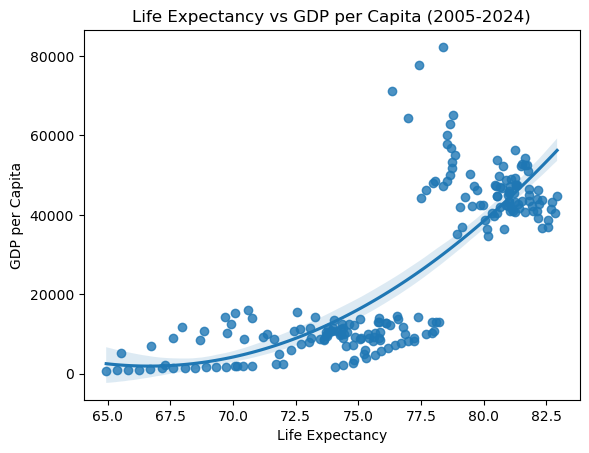

In [32]:
sns.regplot(data=dl, x="Life expectancy at birth, total (years)", y="GDP per capita (current US$)", order=2)
plt.title("Life Expectancy vs GDP per Capita (2005-2024)")
plt.xlabel("Life Expectancy")
plt.ylabel("GDP per Capita")
plt.show()

We can once again see our two groups of countries seperated by GDP per capita. The obvious takeaway from this chart is countries with higher life expectancies are likely to have a high GDP per capita. Another insight is the high variance in poorer countries, with some having 10 years less life expectancy than other countries with similar GDP per capita. Meanwhile, the wealthy countries all have a life expectancy around 80 years, with the only deviation being the United States. Maybe looking at income inequality can tell us more about the different relationships of life expectancy and wealth.

In [ ]:
dlf=dl[~dl['Year'].isin(['2024', '2023', '2022', '2021', '2020'])]
plt.figure(figsize=(12, 6))
sns.scatterplot(data=dlf, x='Life expectancy at birth, total (years)', y='Gini index', hue='Wealthy', palette='tab10')
sns.regplot(data=dlf, x='Life expectancy at birth, total (years)', y='Gini index', color='grey', scatter=False, ci=None)
plt.title('Life Expectancy vs Gini Index (2005-2019)')
plt.xlabel('Life expectancy at birth, total (years)')
plt.ylabel('Gini Index (%)')
plt.legend(title='Above average GDP', loc='upper right')
plt.show()

For context, the Gini Index measures income inequality, with higher values indicating more disparity. The 5 countries that have an above average GDP per capita all have relatively low Gini scores, with the United States being the likely outlier. Looking at all the other countries, we see a lot of variance in Gini scores compared to life expectance. It seems as though Russia and India, the countries with the lowest life expectancy in the dataset, have lower Gini scores than expected, while most of the other non-wealthy nations have relatively high income inequality. While the correlation between income inequality and life expectancy are ambiguous for countries with low GDPs, the wealthy nations follow a trend of negative correlation between income inequality and life expectancy.

## Findings:
* The United Kingdom, United States, France, Germany, and Canada have drastically higher GDP per capita than the other countries in the dataset.
    * The United States has had much more GDP growth over the last 10 years.
* The largest economies are able to have stable GDP growth during global market fluctuations.
* On average, people migrate from low to high GDP per capita countries.
* South Africa has seen lots of change in life expectancy over the last 20 years and very low totals overall.
* Life expectancy is varied in poorer nations, but consistantly high in countries with high GDP per capita.
* Wealthy nations with less income inequality are likely to have higher life expectancies.

## Reflection:
For this project, I wanted to find some relationships between some measurements of important aspects of a nation such as wealth, health, and equality. Although the sample size is not very large, by looking at various countries we can see trends emerging from the visualizations. I decided to revise my first model of GDP per capita to include averages of the two groups I focused on throughout the research. I think adding that extra layer of information is great for setting up the rest of my work because it is emphasizing the divide in the dataset. The small multiples chart was adequate in showing the variation within the two groups of wealth, however, I do think the overall layout is a bit messy and can be hard for readers to decipher. Nonetheless, it does the job it is meant to so I decided to keep it in the project. The last point I'd like to touch on are the trendlines in the data. I will be using trendlines more often in my visaulizations as I believe it does a great job of helping viewers classify the information and get a general sense of the trends formed by each point. Overall, the data wrangling for this project was very managable once I was able to get everything setup and I hope the visualizations do a good job at representing the dataset and global trends.